## 1. Carga de librerías necesarias para implementación

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', 30) # Número máximo de columnas a mostrar
pd.set_option('display.max_rows', 50) # Numero máximo de filas a mostar
import numpy as np
np.random.seed(3301)

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D # for 3D plots

# Para preparar los datos
from sklearn.preprocessing import LabelEncoder
# Para crear el arbol de decisión 
from sklearn.tree import DecisionTreeClassifier 
# Para usar KNN como clasificador
from sklearn.neighbors import KNeighborsClassifier
# Para realizar la separación del conjunto de aprendizaje en entrenamiento y test.
from sklearn.model_selection import train_test_split
# Para evaluar el modelo
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import plot_confusion_matrix
# Para búsqueda de hiperparámetros
from sklearn.model_selection import GridSearchCV
# Para la validación cruzada
from sklearn.model_selection import KFold 
#Librerías para la visualización
import matplotlib.pyplot as plt
# Seaborn
import seaborn as sns 
from sklearn import tree


# Para construir un modelo con el algoritmo de regresión lineal
from sklearn.linear_model import LinearRegression
# Para determinar el rendimiento del modelo con las métricas MSE, MAE y R2
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Para sacar un reporte estadístico que podemos usar para determinar las importancia de las variables explicativas.
import statsmodels.api as sm 


# Composicion de pipelines
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler

# Regresion lineal
from sklearn.linear_model import LinearRegression

# Importar/ Exportar modelos
from joblib import dump, load

# Metricas
from sklearn.metrics import mean_squared_error as mse

# q-q plots
import scipy.stats as stats

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 2. Cargar los datos

In [ ]:
# Se cargan los datos. 
df=pd.read_csv('202210_Laboratorio3_data_DatosTrain.csv', sep=',', encoding = 'utf-8', index_col=False)

Se cargan los datos más recientes

In [ ]:
df_recent = pd.read_csv('202210_Laboratorio3_data_datos_recientes.csv')
print(df_recent.shape)
df_recent.head(5)

(294, 19)


,Unnamed: 0,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 10-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2644,151.0,0,1.80,423.295351,9.0,0,68.6,0,91.0,4.87,9.0,0.1,2284.378580,146.0,0.1,0.1,0.693,14.6
1,2645,153.0,0,1.79,45.851058,85.0,0,67.8,0,91.0,5.90,9.0,0.1,229.714718,99789.0,0.1,0.1,0.683,13.7
2,2646,155.0,0,1.51,310.820338,88.0,0,67.0,0,85.0,5.30,84.0,0.1,1842.444210,99184.0,0.1,0.1,0.679,13.5
3,2647,157.0,0,1.35,330.100739,91.0,4,66.2,0,91.0,5.66,89.0,0.1,1837.977391,98611.0,0.1,0.1,0.674,13.2
4,2648,158.0,0,1.24,40.491289,93.0,0,65.5,0,91.0,4.75,91.0,0.1,263.272360,9882.0,0.1,0.1,0.676,13.7


## 3. Perfilamiento y entendimiento de los datos 

In [ ]:
df.shape

(2644, 20)

Se tienen 2644 filas y 20 variables

In [ ]:
df_recent.shape

(294, 19)

In [ ]:
df.head()

,Unnamed: 0,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 10-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,3,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,4,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
# Revisar las características de los datos: completitud y tipo de dato
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       2644 non-null   int64  
 1   Life expectancy                  2644 non-null   float64
 2   Adult Mortality                  2644 non-null   float64
 3   infant deaths                    2644 non-null   int64  
 4   Alcohol                          2644 non-null   float64
 5   percentage expenditure           2644 non-null   float64
 6   Hepatitis B                      2644 non-null   float64
 7   Measles                          2644 non-null   int64  
 8   BMI                              2644 non-null   float64
 9   under-five deaths                2644 non-null   int64  
 10  Polio                            2644 non-null   float64
 11  Total expenditure                2644 non-null   float64
 12  Diphtheria          

Se puede ver que todas las variables son de tipo numéricas

In [ ]:
# Se observan las ausencias. 
df.isnull().sum()

Unnamed: 0                         0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  10-19 years              0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

No hay ausencias en los datos

In [ ]:
# Resumen de los estadisticos de las variables numéricas
df.describe()

,Unnamed: 0,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 10-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2644.00000,2644.000000,2644.000000,2644.00000,2644.000000,2644.000000,2644.000000,2644.000000,2644.000000,2644.000000,2644.000000,2644.000000,2644.000000,2644.000000,2644.000000,2.644000e+03,2644.000000,2644.000000,2644.000000,2644.000000
mean,1321.50000,69.068797,162.465204,31.14410,4.328684,792.465552,65.532905,2432.922844,37.662746,43.160363,81.967095,5.431078,81.926626,1.617095,6726.080237,1.052152e+07,4.743911,4.778215,0.602879,11.482678
std,763.40138,10.351757,121.186953,123.93232,4.146851,2077.768681,39.221347,11868.652439,20.339750,168.485929,24.521529,2.821982,24.502772,4.822150,13873.881462,5.680977e+07,4.467839,4.553418,0.244040,4.170684
min,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,660.75000,62.975000,73.000000,0.00000,0.407500,7.044565,14.750000,0.000000,18.900000,0.000000,78.000000,3.677500,78.000000,0.100000,238.626882,1.285900e+04,1.500000,1.500000,0.473000,9.500000
50%,1321.50000,72.100000,143.000000,2.00000,3.225000,70.648787,87.000000,14.000000,43.000000,3.000000,93.000000,5.550000,93.000000,0.100000,1254.652810,6.227965e+05,3.200000,3.200000,0.668000,12.300000
75%,1982.25000,75.800000,226.250000,18.00000,7.495000,485.959559,96.000000,329.750000,55.900000,23.000000,97.000000,7.372500,97.000000,0.800000,5277.746332,5.194999e+06,7.200000,7.300000,0.781000,14.200000
max,2643.00000,89.000000,699.000000,1800.00000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.240000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


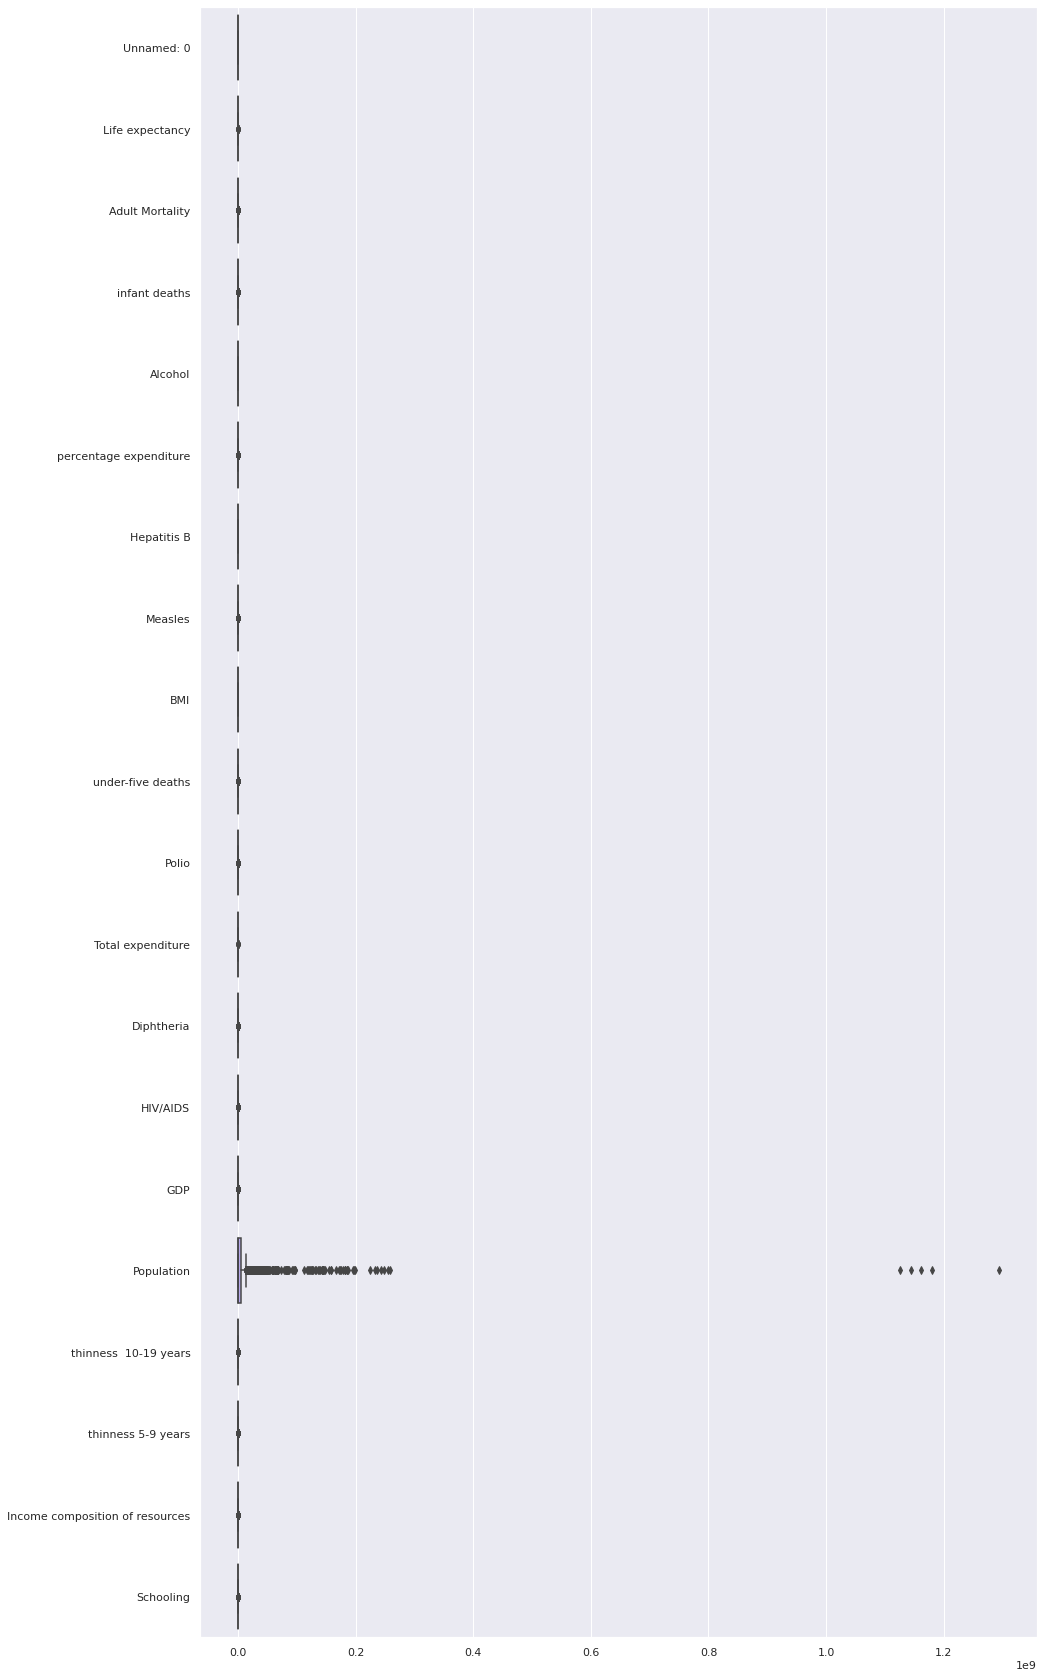

In [ ]:
#Visualización de todas las variables numéricas
fig=plt.figure(figsize=(15,30))
ax = sns.boxplot(data=df, orient="h")

Los datos presentan dominios muy diferentes, por lo que se considera buena idea normalizar.

## Revisaremos los valores que tiene cada columna

In [ ]:
#Se visualizan todos los valores
atributo = "Life expectancy"
df[atributo].value_counts().to_frame()

,Life expectancy
73.0,44
75.0,30
78.0,26
73.6,24
81.0,23
...,...
45.1,1
44.0,1
43.5,1
43.1,1


In [ ]:
atributo = "BMI"
df[atributo].value_counts().to_frame()

,BMI
0.0,34
58.5,16
54.2,15
59.9,14
57.0,14
...,...
77.6,1
42.5,1
64.6,1
11.8,1


Se decide eliminar la columna Unnamed: 0 que corresponde al id, cuyo valor no es necesario para la tarea.

In [ ]:
#Revisar los valores de todas las columnas
# Lista de nombres de columnas
lista = df.columns.tolist()

#Revisar diferentes valores que hay en las columnas para hacer limpieza
for i in lista:
  datos_ver=df.groupby([i]).size()
  print(datos_ver)
  print('-'*20)

Unnamed: 0
0       1
1       1
2       1
3       1
4       1
       ..
2639    1
2640    1
2641    1
2642    1
2643    1
Length: 2644, dtype: int64
--------------------
Life expectancy
0.0      9
36.3     1
39.0     1
41.0     1
41.5     1
        ..
85.0    12
86.0    13
87.0     8
88.0    10
89.0    11
Length: 359, dtype: int64
--------------------
Adult Mortality
0.0       9
1.0      11
2.0       8
3.0       6
4.0       4
         ..
675.0     1
679.0     1
682.0     1
693.0     1
699.0     1
Length: 409, dtype: int64
--------------------
infant deaths
0       803
1       317
2       203
3       157
4        79
       ... 
1400      1
1500      2
1600      1
1700      2
1800      2
Length: 197, dtype: int64
--------------------
Alcohol
0.00     177
0.01     275
0.02      12
0.03      14
0.04       6
        ... 
16.35      1
16.58      1
16.99      1
17.31      1
17.87      1
Length: 1032, dtype: int64
--------------------
percentage expenditure
0.000000        498
0.099872         

In [ ]:
# Es recomendable que todos los pasos de limpieza y preparación se realicen sobre otro archivo.
datos_l = df

#####Ver cantidad de datos fuera de rango

In [ ]:
def new_Measles(row):
    if row['Measles'] >1000 :
      return "Error" 
    return row['Measles']
datos_l['new_Measles']=datos_l.apply (lambda row: new_Measles(row), axis=1)    

In [ ]:
# Transformamos  la columnas que contienen datos con errores de formato en floats: Genero

datos_l['err_Measles'] = pd.to_numeric(datos_l.new_Measles, errors = 'coerce')
#df_prep['new_PURCHASES_TRX'] = pd.to_numeric(df_prep.PURCHASES_TRX, errors = 'coerce')
#df_prep['new_MINIMUM_PAYMENTS'] = pd.to_numeric(df_prep.MINIMUM_PAYMENTS, errors = 'coerce')
#df_prep['new_TENURE'] = pd.to_numeric(df_prep.TENURE, errors = 'coerce')


#Probaremos primero con new_Measles
datos_l['err_Measles'].sample(10)

1806      4.0
2508     30.0
1592    153.0
78        0.0
798       0.0
320       NaN
1949      NaN
2176      0.0
551       0.0
1161      0.0
Name: err_Measles, dtype: float64

In [ ]:
datos_l['err_Measles'].isnull().sum()

459

In [ ]:
datos_l = datos_l.drop(['err_Measles', 'new_Measles'],axis=1)

###**Análisis** 


1. No hay variables con varios valores nulos, pero sí varias con valores atípicos fuera de rango como:
  
*   Life expectancy,  Population, tienen valores en 0 que no tienen sentido en la realidad. 

*   BMI, tiene valores muy pequeños y muy grandes que no tienen sentido. Se dejarán solo aquellos en el rango [14, 55]

*  infant deaths, under-five deaths tienen valores mayores a 1000, y dado que se trata de la cantidad de casos por cada 1000 habitantes, no tiene sentido que haya valores mayores


*  Measles, tiene valores mayores a 1000, y dado que se trata de la cantidad de casos por cada 1000 habitantes, no tiene sentido que haya valores mayores.  Pero debido a la gran cantidad de estos, se decide eliminar la columna de la tabla.


2. Unnamed: 0 es prescindible para la tarea.


Estos análisis nos ayudan a entender el conjunto de datos y a identificar posibles tareas de limpieza que debo realizar antes de generar un modelo.

## 4. Limpieza de datos


#####Eliminación de registros con ausencias, duplicados y columnas prescindibles

#####Inicio limpieza

In [ ]:
# Eliminación registros con ausencias
datos_l = datos_l.dropna()
# Eliminación de registros duplicados.
datos_l = datos_l.drop_duplicates()
#Se elimina la variable "Unnamed: 0"
datos_l = datos_l.drop(['Unnamed: 0', 'Measles'],axis=1)

datos_l.shape

(2644, 18)

#####Eliminación datos fuera de rango en variables numéricas

In [ ]:
#Eliminaremos las filas que contienen datos fuera de rango en:


#infant deaths, under-five deaths valores mayores 1000
datos_l = datos_l.drop(datos_l[datos_l['infant deaths']>1000].index)
datos_l = datos_l.drop(datos_l[datos_l['under-five deaths']>1000].index)

#BMI valores mayores a 55 y menores o iguales a 14
datos_l = datos_l.drop(datos_l[datos_l['BMI']>55].index)
datos_l = datos_l.drop(datos_l[datos_l['BMI']<=14].index) #se fueron resto de datos en estos caso

#Life expectancy,  Population, valor no válido "0".
datos_l = datos_l.drop(datos_l[datos_l['Life expectancy']<1].index)
datos_l = datos_l.drop(datos_l[datos_l[ 'Population']==0].index)
datos_l.shape




(1229, 18)

Verificar que los cambios se realizaron correctamente

In [ ]:
# Lista de nombres de columnas
lista = datos_l.columns.tolist()

#Revisar diferentes valores que hay en las columnas para hacer limpieza
for i in lista:
  datos_ver=datos_l.groupby([i]).size()
  print(datos_ver)
  print('-'*20)


Life expectancy
36.3    1
39.0    1
41.0    1
41.5    1
42.3    1
       ..
83.3    1
83.5    2
83.7    1
84.0    2
85.0    1
Length: 330, dtype: int64
--------------------
Adult Mortality
1.0      4
2.0      4
3.0      3
4.0      3
6.0      3
        ..
666.0    1
675.0    1
682.0    1
693.0    1
699.0    1
Length: 366, dtype: int64
--------------------
infant deaths
0      203
1      117
2       88
3       91
4       48
      ... 
563      1
567      1
571      1
574      1
576      1
Length: 160, dtype: int64
--------------------
Alcohol
0.00      59
0.01     139
0.02       6
0.03       6
0.04       5
        ... 
13.63      1
14.07      1
14.17      1
14.21      1
14.27      1
Length: 611, dtype: int64
--------------------
percentage expenditure
0.000000        65
0.099872         1
0.275648         1
0.530573         1
0.661540         1
                ..
9498.729062      1
10055.349810     1
10598.081870     1
11892.334290     1
14714.825880     1
Length: 1165, dtype: int64
----

In [ ]:
datos_l.describe()


,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 10-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000,1.229000e+03,1229.000000,1229.000000,1229.000000,1229.000000
mean,65.707486,193.946298,33.086249,3.415639,421.103582,62.192026,33.377868,46.903173,78.092758,5.346517,78.030919,2.757038,3477.302092,1.062993e+07,5.934906,6.033279,0.565224,10.708381
std,9.226086,133.591343,79.089767,3.359743,1305.285625,38.886357,14.105936,114.859848,25.414630,2.477424,25.653682,6.569752,8161.648706,3.026155e+07,4.494406,4.528040,0.179084,2.802570
min,36.300000,1.000000,0.000000,0.000000,0.000000,0.000000,14.100000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,3.400000e+01,0.300000,0.200000,0.000000,0.000000
25%,58.800000,98.000000,1.000000,0.340000,18.531430,9.000000,19.600000,2.000000,72.000000,3.870000,73.000000,0.100000,336.331815,1.999930e+05,2.100000,2.100000,0.452000,9.100000
50%,67.000000,175.000000,7.000000,2.680000,62.293611,83.000000,29.100000,9.000000,87.000000,5.300000,87.000000,0.400000,862.946312,1.419631e+06,5.600000,5.700000,0.592000,11.000000
75%,73.000000,272.000000,30.000000,5.710000,254.468826,94.000000,47.800000,47.000000,96.000000,6.810000,96.000000,2.100000,3331.228766,7.437115e+06,8.400000,8.500000,0.694000,12.600000
max,85.000000,699.000000,576.000000,14.270000,14714.825880,99.000000,55.000000,943.000000,99.000000,14.390000,99.000000,50.600000,72119.568700,2.581621e+08,22.200000,22.600000,0.917000,17.500000


###**Normalización**

#### Media

In [ ]:
def mean_norm(df_input):
    return df_input.apply(lambda x: (x-x.mean())/ x.std(), axis=0)

df_mean_norm = mean_norm(datos_l)
df_mean_norm.head()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 10-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,-0.077811,0.521768,0.168878,-1.014344,-0.266793,0.075604,-1.001896,0.150370,-2.846161,1.141330,-0.506238,-0.402881,-0.353537,0.355009,2.305596,2.280350,-0.483815,-0.218245
1,-0.632561,0.581700,0.185068,-1.014344,-0.265068,-0.001622,-1.037286,0.168038,-0.793065,1.149413,-0.623215,-0.402881,-0.350041,-0.218686,2.367838,2.321402,-0.500627,-0.254050
2,-0.632561,0.559226,0.201259,-1.014344,-0.265302,0.049862,-1.072677,0.185705,-0.635134,1.129205,-0.545231,-0.402881,-0.347699,0.320582,2.409334,2.362455,-0.534250,-0.289855
3,-0.676070,0.589192,0.225545,-1.014344,-0.261485,0.127087,-1.108067,0.209262,-0.437721,1.286828,-0.428254,-0.402881,-0.343002,-0.160827,2.450829,2.424033,-0.573478,-0.325661
4,-0.708703,0.611667,0.241736,-1.014344,-0.316129,0.152829,-1.136379,0.232819,-0.398239,1.024123,-0.389261,-0.402881,-0.417551,-0.173163,2.513072,2.465086,-0.623913,-0.433077


#### min-max

In [ ]:
def minmax_norm(df_input):
    return (df_input - df_input.min()) / ( df_input.max() - df_input.min())

df_minmax_norm = minmax_norm(datos_l)
df_minmax_norm.head()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 10-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0.589322,0.375358,0.107639,0.000701,0.004844,0.656566,0.122249,0.088017,0.060606,0.567060,0.656566,0.0,0.008101,0.130679,0.771689,0.763393,0.522356,0.577143
1,0.484600,0.386819,0.111111,0.000701,0.004997,0.626263,0.110024,0.091198,0.585859,0.568450,0.626263,0.0,0.008496,0.001269,0.785388,0.772321,0.519084,0.571429
2,0.484600,0.382521,0.114583,0.000701,0.004976,0.646465,0.097800,0.094380,0.626263,0.564976,0.646465,0.0,0.008760,0.122914,0.794521,0.781250,0.512541,0.565714
3,0.476386,0.388252,0.119792,0.000701,0.005313,0.676768,0.085575,0.098621,0.676768,0.592078,0.676768,0.0,0.009290,0.014320,0.803653,0.794643,0.504907,0.560000
4,0.470226,0.392550,0.123264,0.000701,0.000482,0.686869,0.075795,0.102863,0.686869,0.546908,0.686869,0.0,0.000881,0.011538,0.817352,0.803571,0.495093,0.542857


###Finalizar preparación de datos

In [ ]:
#datos_t= df_mean_norm
datos_t= datos_l


####No normalizados

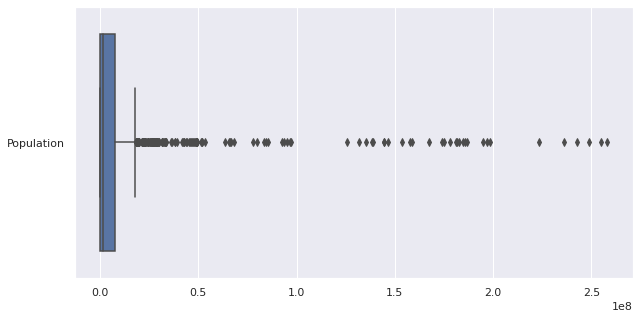

In [ ]:
fig=plt.figure(figsize=(10,5))
population = datos_t[['Population']].copy()
ax = sns.boxplot(data=population, orient="h")

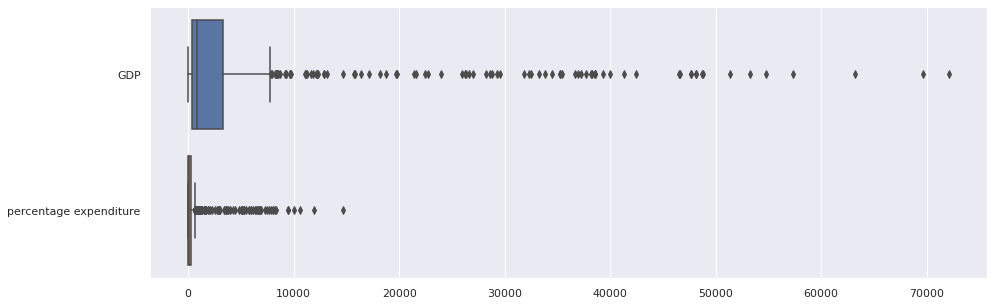

In [ ]:
fig=plt.figure(figsize=(15,5))
gdp = datos_t[['GDP', 'percentage expenditure']].copy()
ax = sns.boxplot(data=gdp, orient="h")

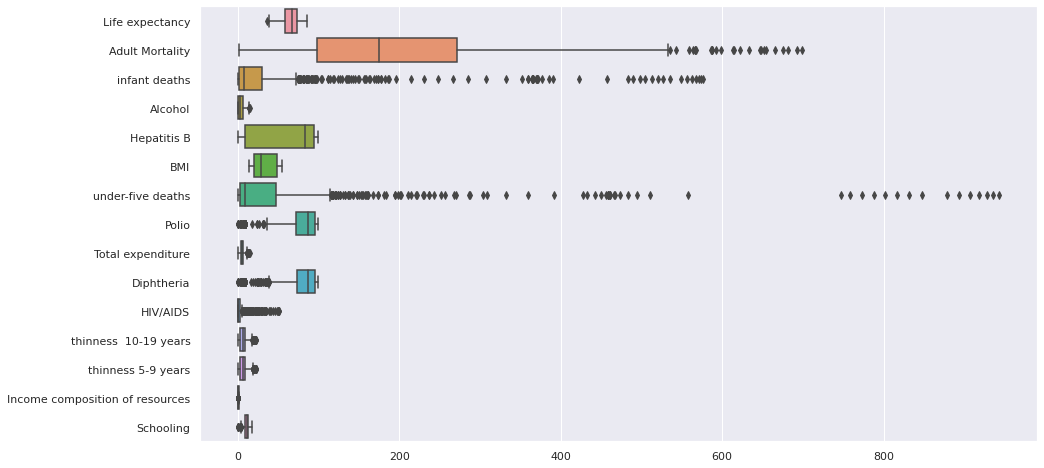

In [ ]:
fig=plt.figure(figsize=(15,8))
datos_miles = datos_t.copy().drop(['Population', 'GDP', 'percentage expenditure'], axis=1)
ax = sns.boxplot(data=datos_miles, orient="h")

####Normalizados

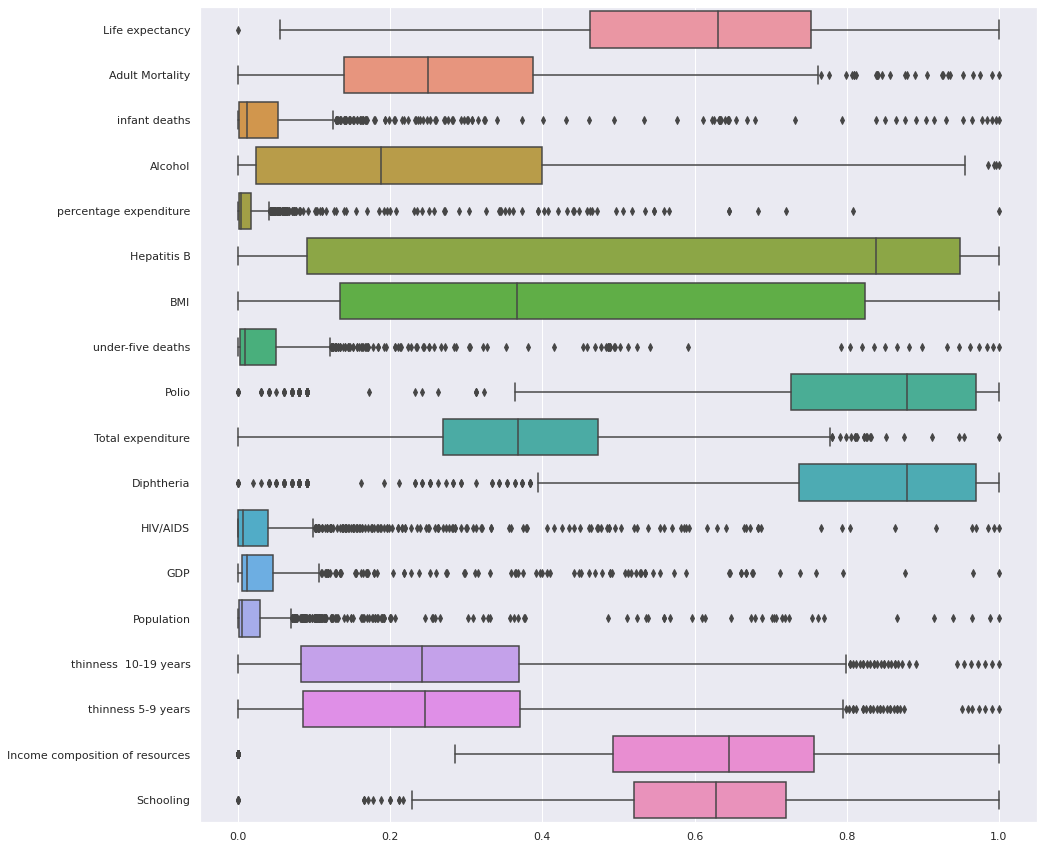

In [ ]:
#Visualización de todas las variables numéricas
fig=plt.figure(figsize=(15,15))
ax = sns.boxplot(data=datos_t, orient="h")

####Continuar

In [ ]:
datos_t.shape

(1229, 18)

**Muestre un subconjunto de los datos luego del pre-procesamiento, para ilustrar cómo quedan los datos que utilizará para aplicar los algoritmos de aprendizaje.**

In [ ]:
datos_t.sample(10)

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 10-19 years,thinness 5-9 years,Income composition of resources,Schooling
530,52.2,366.0,46,0.64,76.523825,39.0,18.2,78,46.0,3.42,39.0,3.1,986.131770,13133589.0,8.8,8.7,0.387,7.3
846,53.8,334.0,3,7.13,309.783459,0.0,19.5,4,46.0,2.23,37.0,3.6,3577.176197,694611.0,1.2,1.1,0.554,8.4
1890,51.4,282.0,57,0.10,17.587227,0.0,14.3,124,43.0,6.55,39.0,1.6,177.828384,12262.0,12.5,12.5,0.261,2.9
751,77.0,12.0,0,11.56,530.483234,0.0,52.8,0,97.0,9.10,97.0,0.1,3751.649460,5358783.0,1.3,1.0,0.862,16.2
2603,67.7,158.0,2,0.01,3.379875,82.0,16.6,2,82.0,1.29,82.0,0.1,117.765674,1184366.0,11.1,11.2,0.620,12.5
1375,52.1,437.0,76,1.66,32.736741,84.0,15.1,118,83.0,4.54,84.0,15.7,395.849351,332149.0,8.9,8.9,0.451,8.5
1622,56.8,271.0,54,0.61,101.811400,66.0,21.3,90,72.0,6.59,66.0,1.5,835.889980,1554989.0,8.5,8.3,0.404,7.5
1020,58.9,296.0,41,1.50,78.711238,84.0,22.4,62,85.0,4.51,84.0,3.1,498.172394,215429.0,8.1,8.1,0.499,8.1
2023,68.5,211.0,52,0.00,0.000000,6.0,25.4,66,79.0,0.00,6.0,0.1,2878.338370,11716359.0,1.0,9.7,0.679,11.7
790,75.3,131.0,7,3.99,344.741216,88.0,51.4,8,85.0,5.92,88.0,0.1,5223.351763,15177355.0,1.3,1.2,0.710,13.2


In [ ]:
#revisar los valores finales
# Lista de nombres de columnas
lista = datos_t.columns.tolist()

#Revisar diferentes valores que hay en las columnas para hacer limpieza
for i in lista:
  datos_ver=datos_t.groupby([i]).size()
  print(datos_ver)
  print('-'*20)

Life expectancy
36.3    1
39.0    1
41.0    1
41.5    1
42.3    1
       ..
83.3    1
83.5    2
83.7    1
84.0    2
85.0    1
Length: 330, dtype: int64
--------------------
Adult Mortality
1.0      4
2.0      4
3.0      3
4.0      3
6.0      3
        ..
666.0    1
675.0    1
682.0    1
693.0    1
699.0    1
Length: 366, dtype: int64
--------------------
infant deaths
0      203
1      117
2       88
3       91
4       48
      ... 
563      1
567      1
571      1
574      1
576      1
Length: 160, dtype: int64
--------------------
Alcohol
0.00      59
0.01     139
0.02       6
0.03       6
0.04       5
        ... 
13.63      1
14.07      1
14.17      1
14.21      1
14.27      1
Length: 611, dtype: int64
--------------------
percentage expenditure
0.000000        65
0.099872         1
0.275648         1
0.530573         1
0.661540         1
                ..
9498.729062      1
10055.349810     1
10598.081870     1
11892.334290     1
14714.825880     1
Length: 1165, dtype: int64
----

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb687aae850>,
      dtype=object)

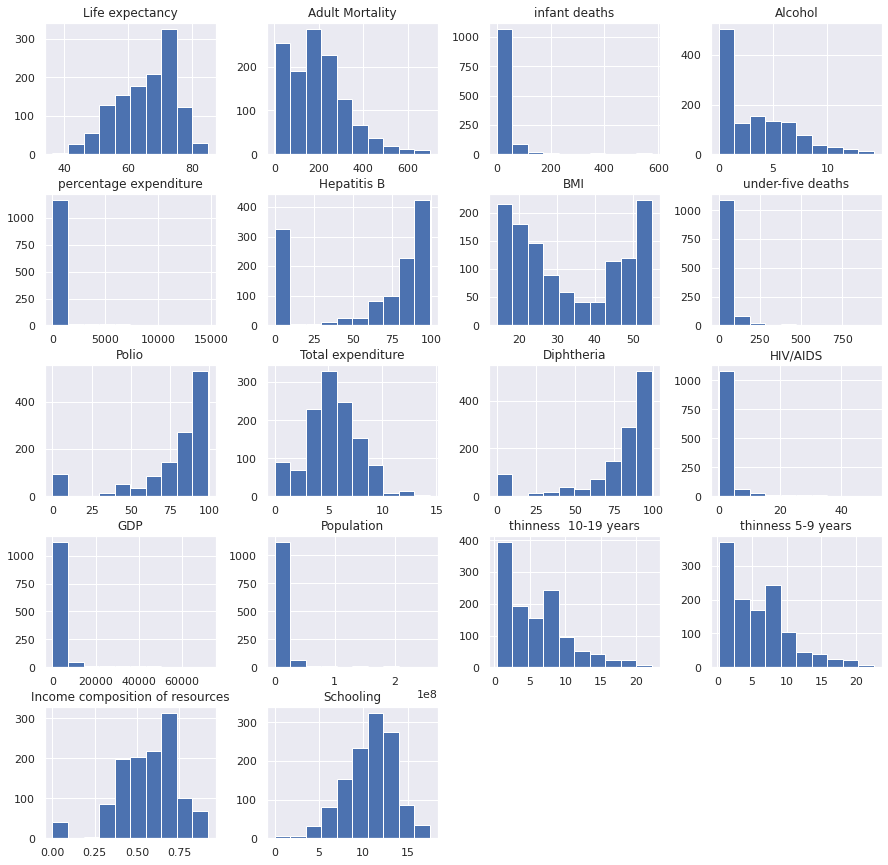

In [ ]:
# Se visualizan los histogramas
datos_t.hist(figsize = (15,15))

Buscamos cuales de las columnas tienen una relacion con Life expectancy:

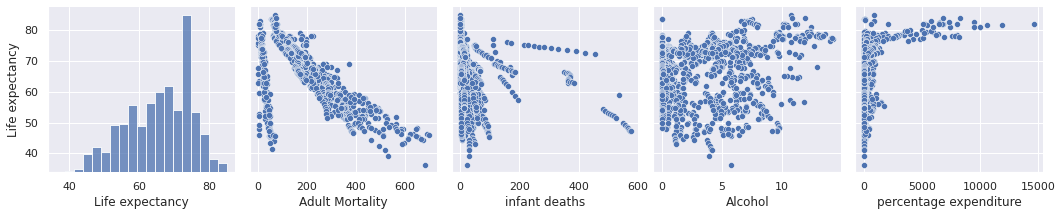

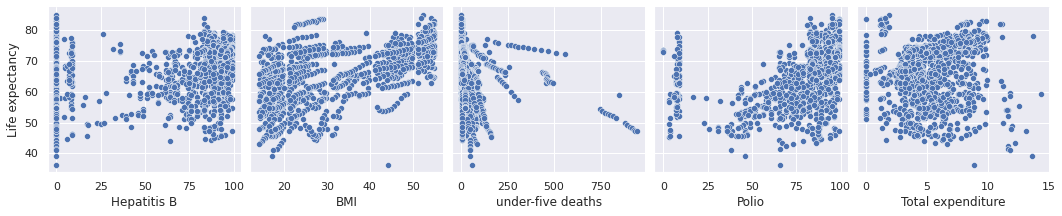

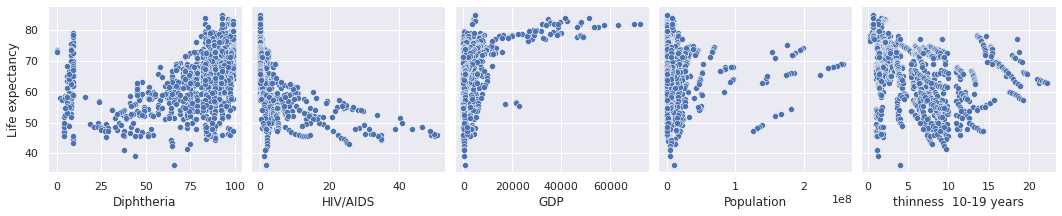

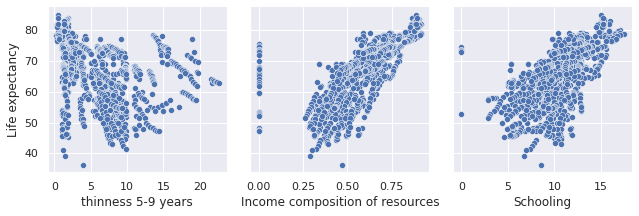

In [ ]:
sns.pairplot(datos_t, height=3, y_vars = 'Life expectancy', x_vars = datos_t.columns[0:5], kind='scatter')
sns.pairplot(datos_t, height=3, y_vars = 'Life expectancy', x_vars = datos_t.columns[5:10], kind='scatter')
sns.pairplot(datos_t, height=3, y_vars = 'Life expectancy', x_vars = datos_t.columns[10:15], kind='scatter')
sns.pairplot(datos_t, height=3, y_vars = 'Life expectancy', x_vars = datos_t.columns[15:], kind='scatter')

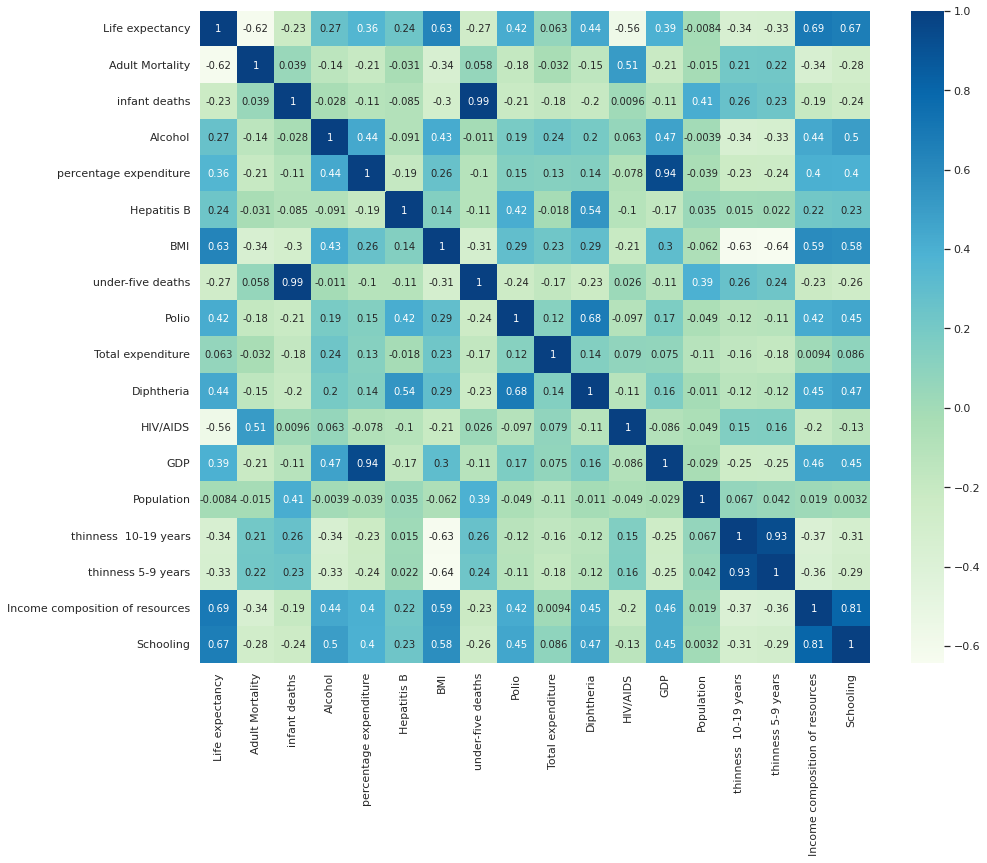

In [ ]:
# ¿Hay correlación entre variables?
plt.figure(figsize =(15,12))
correlacion = datos_t.corr()
sns.heatmap(correlacion, cmap = 'GnBu', annot = True)

De las graficas anteriores vemos que unos buenos candidatos son:
* BMI
* Income composition of resources
* Schooling
* Adult Mortality
* HIV/AIDS

#5. Regresión

##Regresión básica- primera estimación

Realizamos una regresión básica y luego la utilizamos para asignar la columna Life expectancy de los datos recientes.

Se quiere generar un unico modelo que podamos exportar y que pueda ser usado en producción para asignar nuevos valores

In [ ]:
# Preprocesamiento
# Se usa un transformador para seleccionar unicamente las columnas que se quieren usar
selected_cols = ['BMI','Income composition of resources','Schooling','Adult Mortality', 'HIV/AIDS']

pre = [('initial',ColumnTransformer([("selector", 'passthrough',selected_cols)])),]

# Modelo
model = [('model', LinearRegression())]
# Decalra el pipeline
pipeline = Pipeline(pre+model)

# Extracción de las variables explicativas y objetivo para entrenar
X = datos_t.drop('Life expectancy', axis = 1)
y = datos_t['Life expectancy']

pipeline = pipeline.fit(X,y)

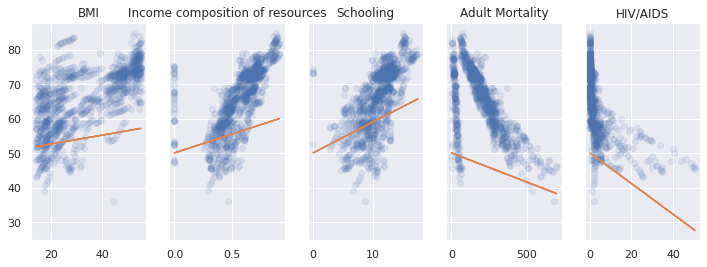

In [ ]:
# Visualizar la regresion lineal en cada dimension
f, axs = plt.subplots(1, len(selected_cols), sharey=True, figsize = (12,4))

for i in range(len(selected_cols)):

    pos_col = i
    col = selected_cols[pos_col]

    # Variable x
    x = X[col]
    # Pendiente
    m = pipeline['model'].coef_[pos_col]
    # Interceto
    b = pipeline['model'].intercept_

    axs[i].plot(x, y, 'o', alpha = 0.1)
    axs[i].plot(x, x*m + b)
    axs[i].set_title(col)

##Exportar e Importar el Modelo

In [ ]:
# Usamos la lbreria joblib
filename = 'pipeline.joblib'
# Se guarda
dump(pipeline, filename) 

['pipeline.joblib']

In [ ]:
# Se lee
p2 = load(filename)
p2

Pipeline(steps=[('initial',
                 ColumnTransformer(transformers=[('selector', 'passthrough',
                                                  ['BMI',
                                                   'Income composition of '
                                                   'resources',
                                                   'Schooling',
                                                   'Adult Mortality',
                                                   'HIV/AIDS'])])),
                ('model', LinearRegression())])

In [ ]:
# Clasificamos los datos recientes
df_recent['Life expectancy'] = p2.predict(df_recent)

In [ ]:
# Se lee
p2 = load(filename)
p2
# Clasificamos los datos recientes
df_recent['Life expectancy'] = p2.predict(df_recent)

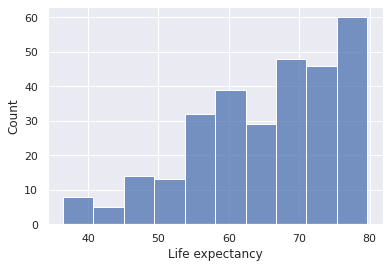

In [ ]:
sns.histplot(df_recent['Life expectancy'])

###Métricas

####Coeficiente de Determinación $R^2$

Este valor indica que porcentaje de la varianza en la variable objetivo se puede explicar con las variables observadas. Este se define como:
$$ R^2 =  1 - \frac{\sum_{i=1}^{n} (y_i - f_i)^2}{\sum_{i=1}^{n} (y_i - \hat{y})^2}$$

donde $y_i$ es el elemento $i$ de la varaible objetivo, $f_i$ el elemento i de los valores predecidos y:

$$ \hat{y} = \frac{1}{n} \sum_{i=1}^{n} y_{i} $$

In [ ]:
p2.score(X,y)

0.780396702359323

Esto quiere decir que aproximadamente el 78% de la variación de la variable Y es explicada por el modelo. 

####Root-Mean-Square Error (RMSE) 


Raiz del error cuadrático medio, definido como:

$$ RSME = \sqrt{\frac{\sum_{i=1}^{n} (y_i - f_i)^2}{n}} $$

In [ ]:
y_true = y
y_predicted = p2.predict(X)

#Hay que sacarle la raiz al valor
rmse_2=np.sqrt(mse(y_true, y_predicted))
rmse_2

4.3217551994343575

Esta métrica compara el valor predicho y el valor conocido. En otras palabras, RMSE cuantifica qué tan diferente es un conjunto de valores, por lo que entre menor sea el valor, significa que más cerca están los valores predichos de los observados y viceversa.

En este caso el error cuadrático medio es de 4.3, es decir,  tenemos un error de esta magnitud ya sea encima o por debajo del resultado que damos.

###Coeficientes

In [ ]:
pipeline['model'].coef_

array([ 0.12912217, 10.86125819,  0.89516409, -0.01684708, -0.44411603])

In [ ]:
# En DataFrame
pd.DataFrame({'columns':selected_cols, 'coef':pipeline['model'].coef_})

,columns,coef
0,BMI,0.129122
1,Income composition of resources,10.861258
2,Schooling,0.895164
3,Adult Mortality,-0.016847
4,HIV/AIDS,-0.444116


In [ ]:
importancia = pipeline['model'].coef_
importancia_atributo = pd.DataFrame(data={"Atributo": selected_cols,"Importancia": importancia})
importancia_atributo = importancia_atributo.sort_values(by='Importancia', ascending=False).reset_index(drop=True)
importancia_atributo

,Atributo,Importancia
0,Income composition of resources,10.861258
1,Schooling,0.895164
2,BMI,0.129122
3,Adult Mortality,-0.016847
4,HIV/AIDS,-0.444116


####Tercer estimador -Normalizando

In [ ]:
# Preprocesamiento
# Se usa un transformador para seleccionar unicamente las columnas que se quieren usar
selected_cols = ['BMI','Income composition of resources','Schooling','Adult Mortality', 'HIV/AIDS']

pre = [('initial',ColumnTransformer([("selector", 'passthrough',selected_cols)])),       
       ('imputer', SimpleImputer(missing_values=np.nan, strategy='median')),
       ('scaler', MinMaxScaler())]

# Modelo
model = [('model', LinearRegression()),]
# Decalra el pipeline
p3 = Pipeline(pre+model)

# Extracción de las variables explicativas y objetivo para entrenar
X = datos_t.drop('Life expectancy', axis = 1)
y = datos_t['Life expectancy']

p3 = p3.fit(X,y)

print("R cuadrado:", p3.score(X,y))
y_predicted = p3.predict(X)
rmse_3=np.sqrt(mse(y_true, y_predicted))

print("RMSE:", rmse_3)

R cuadrado: 0.7803967023593231
RMSE: 4.3217551994343575


Los coeficientes de la regresión nos pueden dar información sobre la relación entre las variables observadas y la variable objetivo.

La validez de estos coeficientes depende de que se cumplan correctamente las suposiciones de una regresión lineal.

In [ ]:
# En DataFrame
pd.DataFrame({'columns':selected_cols, 'coef':p3['model'].coef_})

,columns,coef
0,BMI,5.281097
1,Income composition of resources,9.959774
2,Schooling,15.665371
3,Adult Mortality,-11.759263
4,HIV/AIDS,-22.427860


###Supuestos de la Regresión Lineal

####Colinealidad

Es necesario que las columnas utilizadas no tengan (o tengan muy poca) colinealidad. La forma mas sencilla de hacer esto es con la matriz de correlación

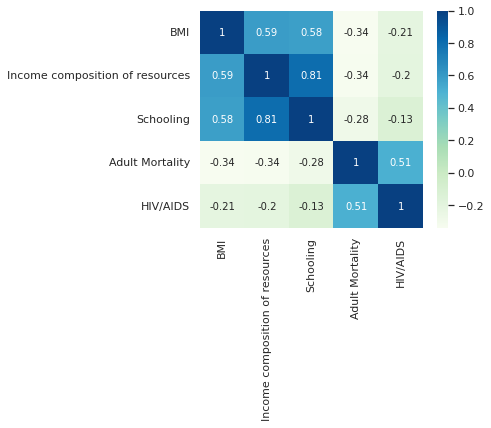

In [ ]:
df_temp = datos_t[selected_cols]


f = plt.figure(figsize=(5, 4))

sns.heatmap(df_temp.corr(), cmap = 'GnBu', annot = True)


Vemos que existe una alta colinealidad entre Income composition of resources
y Schooling. Por eso se va usar solo una de estas. ###Probablemente la de income que tiene mayor correlación con la objetivo.

#####Cuarto estimador

In [ ]:
X = datos_t.drop('Life expectancy', axis = 1)
y = datos_t['Life expectancy']

cols = ['BMI','HIV/AIDS','Schooling','Adult Mortality']
model = [('initial',ColumnTransformer([("selector", 'passthrough',cols)])),
         ('imputer', SimpleImputer(missing_values=np.nan, strategy='median')),
         ('scaler', MinMaxScaler()),
         ('model', LinearRegression())]
p4_S = Pipeline(model)
p4_S = p4_S.fit(X,y)
print("R cuadrado:",f"{p4_S.score(X,y)}")
y_true = y
y_predicted = p4_S.predict(X)
rmse_4s=np.sqrt(mse(y_true, y_predicted))
print("RMSE:",rmse_4s)

R cuadrado: 0.766314965738716
RMSE: 4.458165477406143


In [ ]:
X = datos_t.drop('Life expectancy', axis = 1)
y = datos_t['Life expectancy']

cols = ['BMI','HIV/AIDS','Adult Mortality','Income composition of resources']
model = [('initial',ColumnTransformer([("selector", 'passthrough',cols)])),
         ('imputer', SimpleImputer(missing_values=np.nan, strategy='median')),
         ('scaler', MinMaxScaler()),
         ('model', LinearRegression())]
p4_I = Pipeline(model)
p4_I = p4_I.fit(X,y)
print("R cuadrado:",f"{p4_I.score(X,y)}")
y_true = y
y_predicted = p4_I.predict(X)
rmse_4i=np.sqrt(mse(y_true, y_predicted))
print("RMSE:",rmse_4i)

R cuadrado: 0.7559363736875946
RMSE: 4.556089684411059


El modelo va mejor cuando se usan ambas variables.Sin embargo, para cumplir con los supuestos se va a sacar Schooling que tiene menor correlación con la variable objetivo.

####Linealidad

Es necesario que la relación entre cada variable explicativa y la varable objetivo sea lineal. Muchas veces la mejor forma de hacer esto es visualmente:

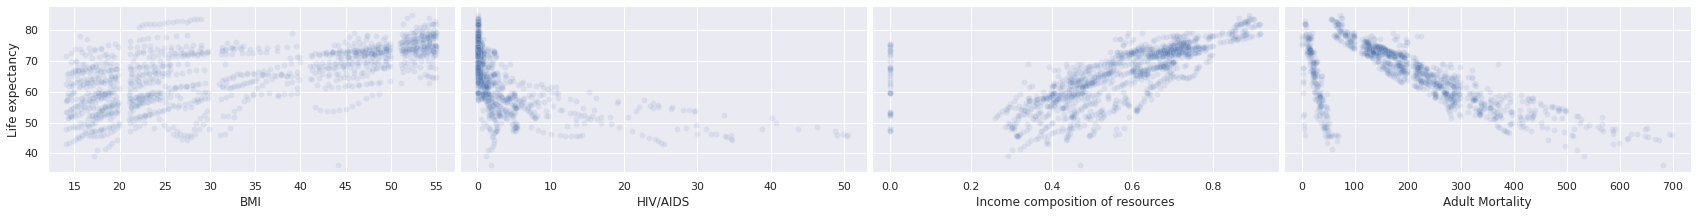

In [ ]:
sns.pairplot(datos_t, height=3, aspect = 2, y_vars = 'Life expectancy', x_vars = ['BMI', 'HIV/AIDS','Income composition of resources','Adult Mortality'], kind='scatter', plot_kws = {'alpha':0.1})

In [ ]:
# Revisamos

# Creamos la variable
X = datos_t[['BMI']].copy()
X['BMI_2'] = X['BMI']**2

# columna
col = 'BMI_2'

pre = [('initial',ColumnTransformer([("selector", 'passthrough',[col])])),
       ('imputer', SimpleImputer(missing_values=np.nan, strategy='median')),
       ('scaler', MinMaxScaler())]

model = [('model', LinearRegression())]

p_temp = Pipeline(pre+model)

p_temp = p_temp.fit(X,y)

print(f"{col}: {p_temp.score(X,y)}")
y_predicted = p_temp.predict(X)
rmse_temp=np.sqrt(mse(y_true, y_predicted))
print("RMSE:", rmse_temp)

BMI_2: 0.39622972929877376
RMSE: 7.16599658542919


####Normalidad en los Errores

Otra suposición de la regresión lineal es que los errores tienen una distribución normal. Para esto se puede usar:
* Grafico de dispersión entre los errores y el valor predicto
* Grafico Q-Q

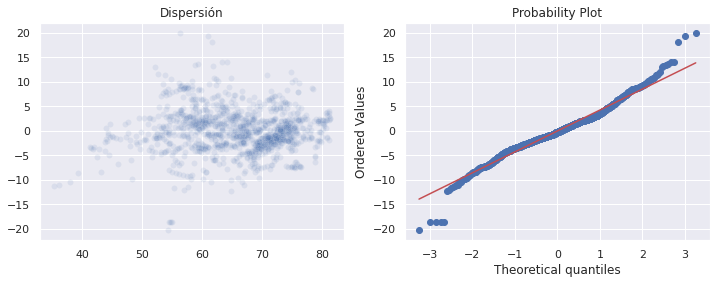

In [ ]:
X = datos_t.drop('Life expectancy', axis = 1)
y = datos_t['Life expectancy']

# Calculamos los errores
errors = (p3.predict(X) - y).values

fig, axes = plt.subplots(1, 2, figsize = (12,4))

# Dispersión
d=sns.scatterplot(x = p3.predict(X), y = errors, alpha = 0.1, ax = axes[0])
d.set_title("Dispersión")

# q-q plot
_ = stats.probplot(errors, dist="norm", plot=axes[1])

####Normalizado

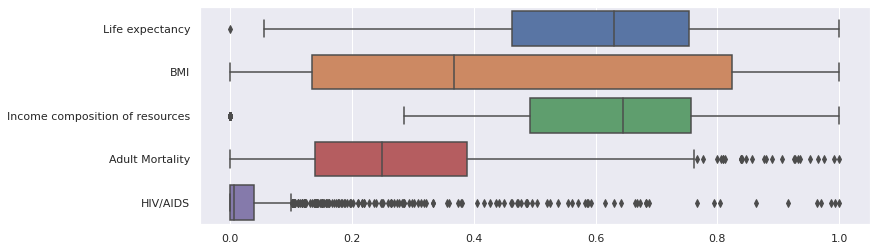

In [ ]:
# Diagrama de caja
fig=plt.figure(figsize=(12,4))
ax = sns.boxplot(data= datos_t[['Life expectancy','BMI','Income composition of resources','Adult Mortality', 'HIV/AIDS']], orient="h")

In [ ]:
# Elimine los valores atipicos superiores en la variable objetivo y genere un nuevo estimador que utilice
#las columnas: energy y valence. Guarde el estimador en una variable llamda p3.
df_clean = datos_t.copy()

a=df_clean['Life expectancy']>0.22
df_clean=df_clean[a]

'''a=df_clean['Schooling']>0.26
df_clean=df_clean[a]'''

a=df_clean['Adult Mortality']<0.65
df_clean=df_clean[a]

a=df_clean['Adult Mortality']>0.002
df_clean=df_clean[a]

a=df_clean['Income composition of resources']>0
df_clean=df_clean[a]

a=df_clean['HIV/AIDS']<0.1
df_clean=df_clean[a]

In [ ]:
df_clean.groupby(['Adult Mortality']).size()

Adult Mortality
0.000000    4
0.001433    4
0.002865    2
0.004298    1
0.007163    2
           ..
0.606017    1
0.618911    1
0.624642    1
0.627507    1
0.644699    1
Length: 284, dtype: int64

In [ ]:
df_clean.shape

(1019, 18)

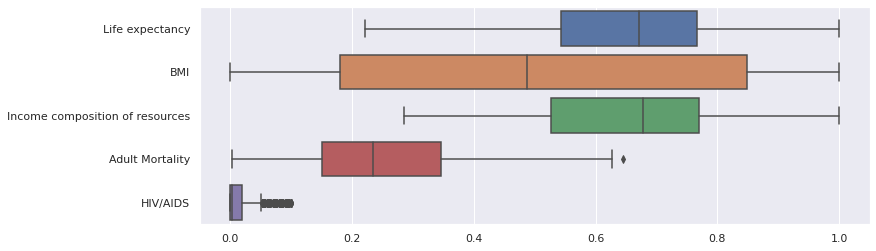

In [ ]:
# Diagrama de caja
fig=plt.figure(figsize=(12,4))
ax = sns.boxplot(data= df_clean[['Life expectancy','BMI','Income composition of resources','Adult Mortality','HIV/AIDS']], orient="h")

####Sin normalizar

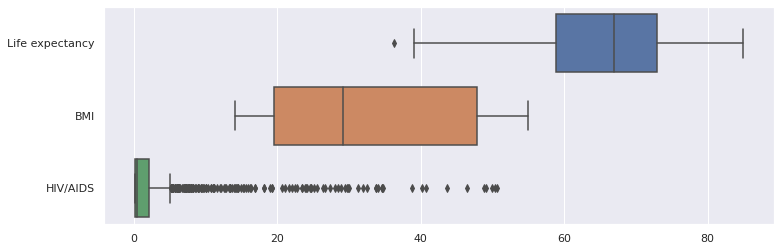

In [ ]:
# Diagrama de caja
fig=plt.figure(figsize=(12,4))
ax = sns.boxplot(data= datos_t[['Life expectancy','BMI', 'HIV/AIDS']], orient="h")

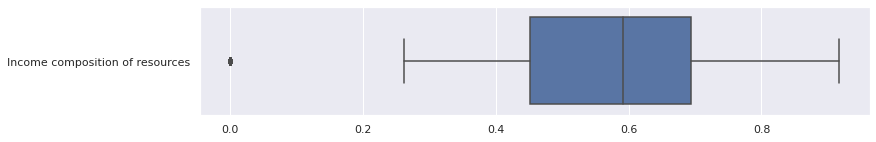

In [ ]:
fig=plt.figure(figsize=(12,2))
ax = sns.boxplot(data= datos_t[['Income composition of resources']], orient="h")

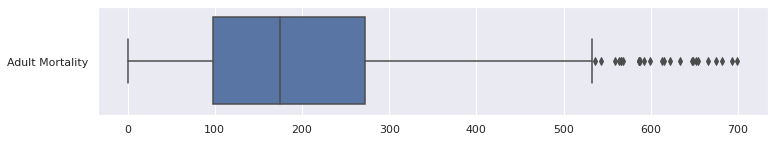

In [ ]:
# Diagrama de caja
fig=plt.figure(figsize=(12,2))
ax = sns.boxplot(data= datos_t[['Adult Mortality']], orient="h")

In [ ]:
# Elimine los valores atipicos superiores en la variable objetivo y genere un nuevo estimador que utilice
#las columnas: energy y valence. Guarde el estimador en una variable llamda p3.
df_clean = datos_t.copy()

a=df_clean['Life expectancy']>46
df_clean=df_clean[a]

'''a=df_clean['Schooling']>5.8
df_clean=df_clean[a]
a=df_clean['Schooling']<17.5
df_clean=df_clean[a]'''

a=df_clean['Adult Mortality']<500
df_clean=df_clean[a]

a=df_clean['Income composition of resources']>0
df_clean=df_clean[a]

a=df_clean['HIV/AIDS']<15
df_clean=df_clean[a]

df_clean.shape

(1111, 18)

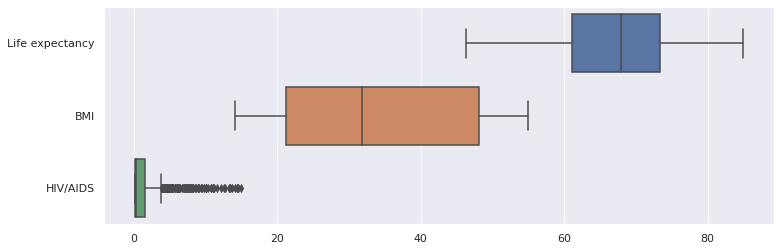

In [ ]:
# Diagrama de caja
fig=plt.figure(figsize=(12,4))
ax = sns.boxplot(data= df_clean[['Life expectancy','BMI', 'HIV/AIDS']], orient="h")

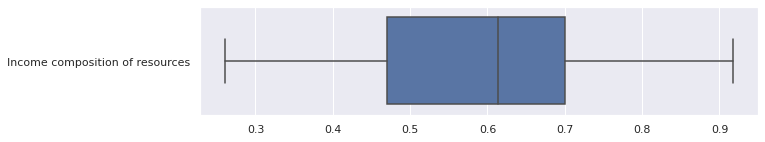

In [ ]:
# Diagrama de caja
fig=plt.figure(figsize=(10,2))
ax = sns.boxplot(data= df_clean[['Income composition of resources']], orient="h")

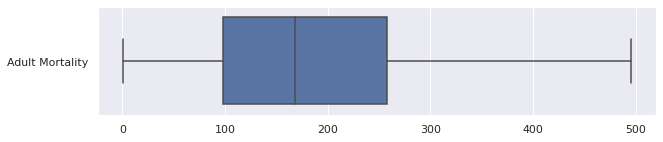

In [ ]:
# Diagrama de caja
fig=plt.figure(figsize=(10,2))
ax = sns.boxplot(data= df_clean[['Adult Mortality']], orient="h")

####Quinto estimador

In [ ]:
# Preprocesamiento
# Se usa un transformador para seleccionar unicamente las columnas que se quieren usar
selected_cols = ['BMI','Income composition of resources','Adult Mortality', 'HIV/AIDS']

pre = [('initial',ColumnTransformer([("selector", 'passthrough',selected_cols)])),       
       ('imputer', SimpleImputer(missing_values=np.nan, strategy='median')),
       ('scaler', MinMaxScaler())]

# Modelo
model = [('model', LinearRegression())]
# Decalra el pipeline
p5 = Pipeline(pre+model)

# Extracción de las variables explicativas y objetivo para entrenar
X = df_clean.drop('Life expectancy', axis = 1)
y = df_clean['Life expectancy']

p5 = p5.fit(X,y)

print("R cuadrado:",f"{p5.score(X,y)}")
y_true = y
y_predicted = p5.predict(X)
rmse_5=np.sqrt(mse(y_true, y_predicted))
print("RMSE:",rmse_5)

R cuadrado: 0.8435611684084069
RMSE: 3.2685655002639566


###Varianza Constante (Homocedasticidad)

Esta suposición exige que la varianza en los errores se mantenga constante a medida que varia la variable objetivo. Al igual que otras suposiciones anteriores, la mejor forma de identificar esto es visualmente, graficando la variable objetivo contra los errores.

####Sexto estimador

Usamos la función PolynomialFeatures que genera una nueva matriz de características que consiste en todas las combinaciones de polinomios de las características con un grado menor o igual que el grado especificado.

In [ ]:
# Preprocesamiento
# Se usa un transformador para seleccionar unicamente las columnas que se quieren usar
selected_cols = ['BMI','Income composition of resources','Adult Mortality', 'HIV/AIDS']

pre = [('initial',ColumnTransformer([("selector", 'passthrough',selected_cols)])),       
       ('imputer', SimpleImputer(missing_values=np.nan, strategy='median')),
       ('scaler', MinMaxScaler()),        
       ('polinomial_feature', PolynomialFeatures(4))]

# Modelo
model = [('model', LinearRegression())]
# Decalra el pipeline
p6 = Pipeline(pre+model)

# Extracción de las variables explicativas y objetivo para entrenar
X = df_clean.drop('Life expectancy', axis = 1)
y = df_clean['Life expectancy']

p6 = p6.fit(X,y)

print("R cuadrado:",f"{p6.score(X,y)}")
y_true = y
y_predicted = p6.predict(X)
rmse_6=np.sqrt(mse(y_true, y_predicted))
print("RMSE:",rmse_6)

R cuadrado: 0.9359230618735018
RMSE: 2.0918752718668974


##Evaluación cuantitativa

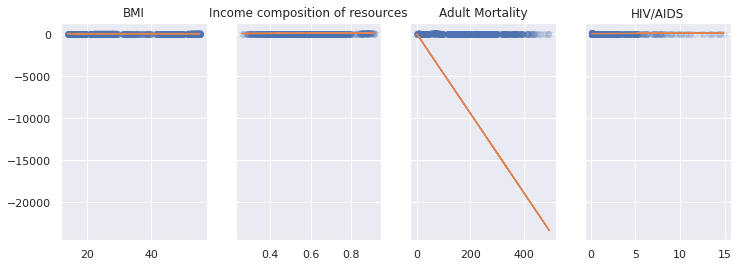

In [ ]:
# Visualizar la regresion lineal en cada dimension
f, axs = plt.subplots(1, len(selected_cols), sharey=True, figsize = (12,4))

for i in range(len(selected_cols)):

    pos_col = i
    col = selected_cols[pos_col]

    # Variable x
    x = X[col]
    # Pendiente
    m = p6['model'].coef_[pos_col]
    # Interceto
    b = p6['model'].intercept_

    axs[i].plot(x, y, 'o', alpha = 0.1)
    axs[i].plot(x, x*m + b)
    axs[i].set_title(col)

Resultados de las métricas para cada caso implementado

In [ ]:
print("P2-R_cuadrado:",f"{p2.score(X,y)}","RMSE:", rmse_2)
print("P3-R_cuadrado:",f"{p3.score(X,y)}","RMSE:", rmse_3)
print("P4_I-R_cuadrado:",f"{p4_I.score(X,y)}", rmse_4i)
print("P4_S-R_cuadrado:",f"{p4_S.score(X,y)}", rmse_4s)
print("P5-R_cuadrado:",f"{p5.score(X,y)}", rmse_5)
print("P6-R_cuadrado:",f"{p6.score(X,y)}", rmse_6)

P2-R_cuadrado: 0.7908181288686439 RMSE: 4.3217551994343575
P3-R_cuadrado: 0.7908181288686436 RMSE: 4.3217551994343575
P4_I-R_cuadrado: 0.7838811811102473 4.556089684411059
P4_S-R_cuadrado: 0.7620813576765866 4.458165477406143
P5-R_cuadrado: 0.8435611684084069 3.2685655002639566
P6-R_cuadrado: 0.947086815766419 1.9009332157052312


Se pude notar que el mejor modelo es el p6, pues tiene mayor R cuadrado, y menor RMSE.

Esto quiere decir que aproximadamente el 94.7% de la variación de la variable Y es explicada por el modelo.
Además, el error cuadrático medio es de aproximadamente 1.9, es decir, tenemos un error de esta magnitud ya sea encima o por debajo del resultado que damos.

**¿Su equipo recomienda instalar el modelo de estimación en producción o es mejor continuar usando expertos para la tarea?**
En términos generales, sí. De acuerdo a las métricas, se tiene un porcentaje acpetable para el R cuadrado y el RMSE no es tan alto (aunque estas métricas podrían ser mejores). Sin embargo, también depende del nivel de precisión que el negocio desee.Si desea tener una mejor preciusión, entonces es recomedable que busque otras alternativas. 

##Evaluación cualitativa

###Validación de supuestos

####Colinealiedad

Como se notó  que existía una alta colinealidad entre Income composition of resources y Schooling, se decidió usar solo una de estas: income que tiene mayor correlación con la objetivo.

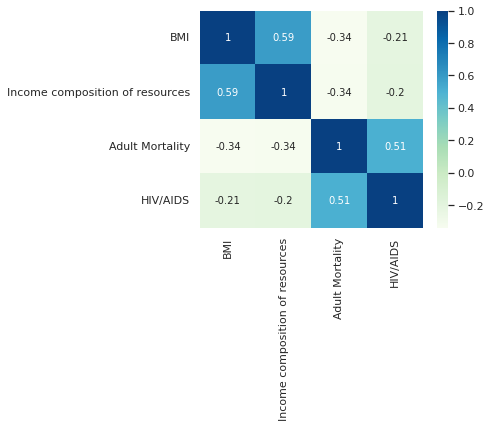

In [ ]:
df_temp = datos_t[selected_cols]
f = plt.figure(figsize=(5, 4))
sns.heatmap(df_temp.corr(), cmap = 'GnBu', annot = True)

####Linealidad

Visualmente, la relación entre cada variable explicativa y la varable objetivo es lineal

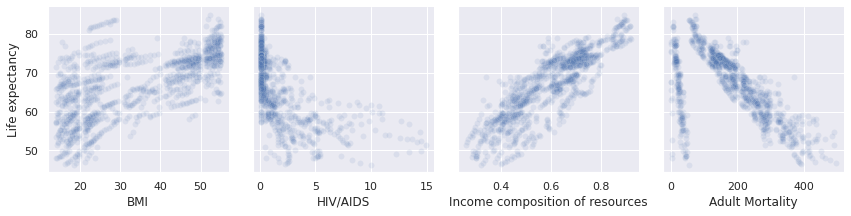

In [ ]:
sns.pairplot(df_clean, height=3, aspect = 1, y_vars = 'Life expectancy', x_vars = ['BMI', 'HIV/AIDS','Income composition of resources','Adult Mortality'], kind='scatter', plot_kws = {'alpha':0.1})

####Varianza Constante (Homocedasticidad)

Para este supuesto se usó la función PolynomialFeatures que genera una nueva matriz de características que consiste en todas las combinaciones de polinomios de las características con un grado menor o igual que el grado especificado. Así se obtuvo el sexto y mejor estimador

###Interpretación de coeficientes

Ver los coeficientes del mejor modelo.

In [ ]:
p6['model'].coef_

array([ 9.54638761e-08,  9.28779448e+01, -4.72651994e+01,  7.47288052e+00,
       -1.13305009e+02, -3.18375266e+02, -8.81793072e+01, -1.10280509e+02,
       -8.49726079e+02,  2.69687984e+02, -3.90594688e+02,  1.07997431e+03,
        4.14853594e+02,  3.11797826e+02,  3.30929855e+02,  2.83156110e+02,
        9.21432884e+02,  6.37086879e+02,  3.52870457e+03, -7.56409481e+02,
       -1.40630828e+03, -2.55548559e+03,  9.37225159e+02,  1.54322829e+03,
        2.67677234e+03, -1.75458542e+02,  1.93807328e+03, -1.50601759e+03,
        2.32501371e+02, -2.02581186e+03, -2.79858645e+03, -1.68747689e+03,
       -1.36593593e+02, -7.84580691e+02, -5.94410028e+02, -1.34490854e+02,
        1.03699536e+02, -5.94630414e+02, -1.60464421e+03, -2.00164179e+03,
       -5.87099316e+02, -4.90912050e+03, -4.82210212e+02, -3.22884493e+02,
       -6.26846829e+03,  2.19587252e+03,  2.03789450e+03,  8.32403144e+03,
        3.69277613e+03, -6.72229808e+03,  6.64572213e+03, -3.33485892e+03,
       -7.86888529e+02, -

Debido a que después de utilizar  PolynomialFeatures para obtener el mejor modelo, se obtienen cowficientes más difíciles de interpretar, se va usar el resultado del mejor modelo antes de aplicar esta mejora que es el p5

In [ ]:
importancia = p5['model'].coef_
importancia_atributo = pd.DataFrame(data={"Atributo": selected_cols,"Importancia": importancia})
importancia_atributo = importancia_atributo.sort_values(by='Importancia', ascending=False).reset_index(drop=True)
importancia_atributo

,Atributo,Importancia
0,Income composition of resources,23.214458
1,BMI,1.160333
2,Adult Mortality,-6.532662
3,HIV/AIDS,-13.568240


Se puede observar que la columna *Income composition of resources* es la que mayor influencia tiene sobre  *Life expectancy*, seguida por el *BMI*, *Adult Mortality*, y el *HIV/AIDS*.

####Normalidad en los errores

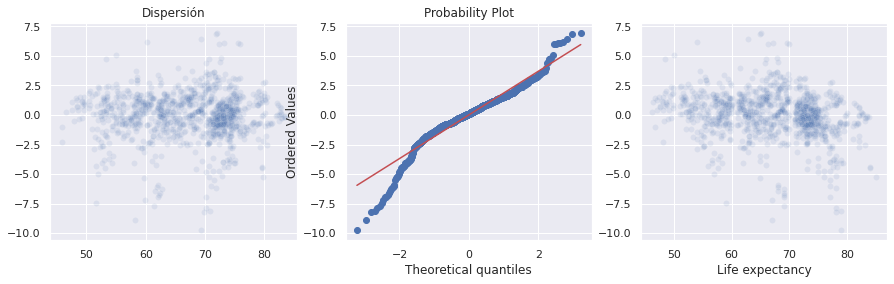

In [ ]:
X = df_clean.drop('Life expectancy', axis = 1)
y = df_clean['Life expectancy']

# Calculamos los errores
errors = (p6.predict(X) - y).values

fig, axes = plt.subplots(1, 3, figsize = (15,4))

# Dispersión
d=sns.scatterplot(x = p6.predict(X), y = errors, alpha = 0.1, ax = axes[0])
d.set_title("Dispersión")

# q-q plot
_ = stats.probplot(errors, dist="norm", plot=axes[1])

# Visualizamos nuestros datos
# Calculamos los errores
errors = (p6.predict(X) - y).values
sns.scatterplot(data  = df_clean, x = 'Life expectancy', y = errors, alpha = 0.1, ax = axes[2])

#Final

Segundo mejor estimador

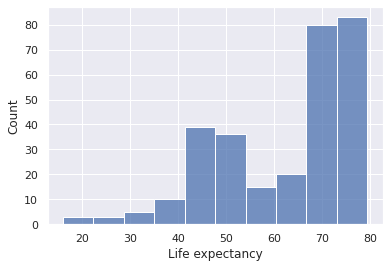

In [ ]:
df_recent.drop('Life expectancy', axis = 1, inplace = True)
df_recent['Life expectancy'] = p5.predict(df_recent)
sns.histplot(df_recent['Life expectancy'])

Se usa el mejor estimador p6

(5.0, 85.0)

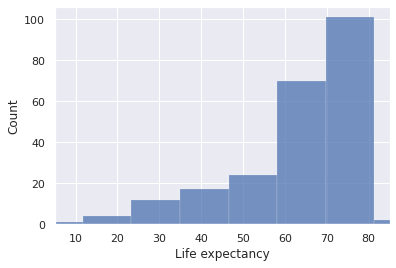

In [ ]:
#Usamos el último estimador (el mejor) para clasificar los datos recientes
df_recent.drop('Life expectancy', axis = 1, inplace = True)
df_recent['Life expectancy'] = p6.predict(df_recent)
sns.histplot(df_recent['Life expectancy'])
plt.xlim(5,85)

In [ ]:
#Exportamos el estmador final
# Usamos la lbreria joblib
filename = 'pipeline.joblib'
# Se guarda
dump(p6, filename)

['pipeline.joblib']